In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader 
import torchvision
from torchvision import transforms, utils

In [3]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ]),
    'test': transforms.Compose([
        transforms.ToTensor()
    ])
}

trainset = torchvision.datasets.CIFAR10(root='./datasets', train=True,
                                        transform=data_transforms['train'], download=True)
trainset_loader = DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='/datasets', train=False,
                                      transform=data_transforms['test'], download=True)
testset_loader = DataLoader(testset, batch_size=10, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
def imshow(images):
    images = images / 2 + 0.5
    np_img = images.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

In [5]:
dataiter = iter(trainset_loader)
images, labels = dataiter.next()

In [6]:
print('Images shape {}'.format(images.size()))
print('Labels shape {}'.format(labels.shape))

Images shape torch.Size([10, 3, 32, 32])
Labels shape torch.Size([10])


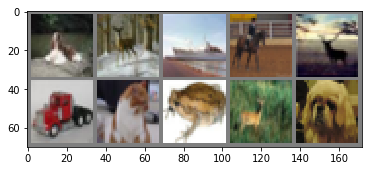

dog deer ship horse deer truck cat frog deer dog


In [22]:
imshow(utils.make_grid(images, nrow=5))
print(' '.join('%s' % classes[labels[j]] for j in range(len(labels))))